In [1]:
import numpy as np
from pylab import *
from craco.cardcap import CardcapFile
from astropy.io import fits

%matplotlib notebook

In [2]:
!ls data/SB40884/short

0407-debughdr-lsb11-dp-b0.fits	0407-debughdr-lsb11-dp-ball.fits
0407-debughdr-lsb11-dp-b0.npy	0407-debughdr-lsb11-dp-ball.npy


In [3]:
fname = 'data/SB40884/short/0407-debughdr-lsb11-dp-b0.fits'

In [4]:
# if you want to look at frequencies, you need to load teh fits directly.
ccap = CardcapFile(fname)
ccap.dtype


dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (1, 465, 2, 2))])

In [5]:
ccap.frequencies


array([[1099.57407407, 1100.57407407, 1101.57407407, 1102.57407407],
       [1099.74074074, 1100.74074074, 1101.74074074, 1102.74074074],
       [1099.90740741, 1100.90740741, 1101.90740741, 1102.90740741],
       [1100.07407407, 1101.07407407, 1102.07407407, 1103.07407407],
       [1100.24074074, 1101.24074074, 1102.24074074, 1103.24074074],
       [1100.40740741, 1101.40740741, 1102.40740741, 1103.40740741]])

<IPython.core.display.Javascript object>


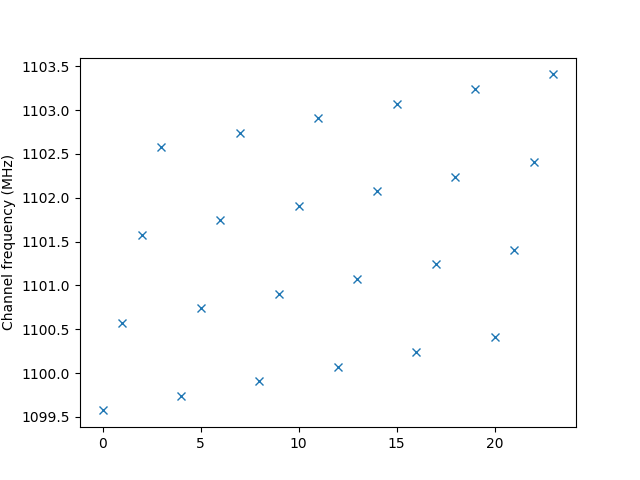

Text(0, 0.5, 'Channel frequency (MHz)')

In [6]:
figure()
plot(ccap.frequencies.flat,'x') 
# the key point here is that to order things by channel, you need to read FPGA first, then channel
ylabel('Channel frequency (MHz)')

In [7]:
# if you have CardcaptureFile you can do this
pkts = ccap.load_packets()
pkts.shape

# otherwise
pkts = np.load(fname.replace('.fits','.npy'))

<IPython.core.display.Javascript object>


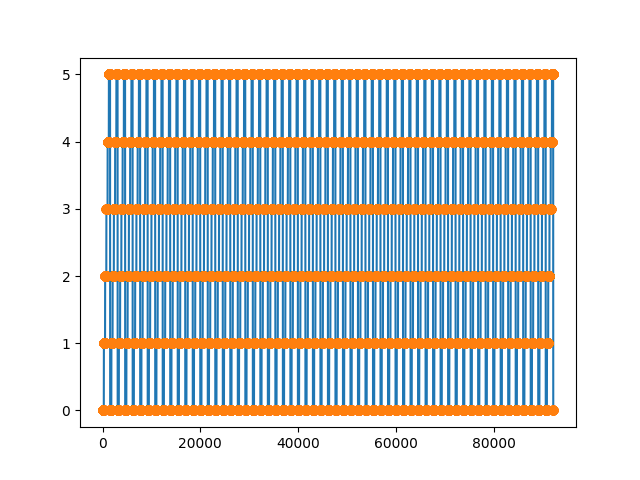

In [8]:
figure()
plot(pkts['fpga_id'])
plot(pkts['fpga_id'],'o')

<IPython.core.display.Javascript object>


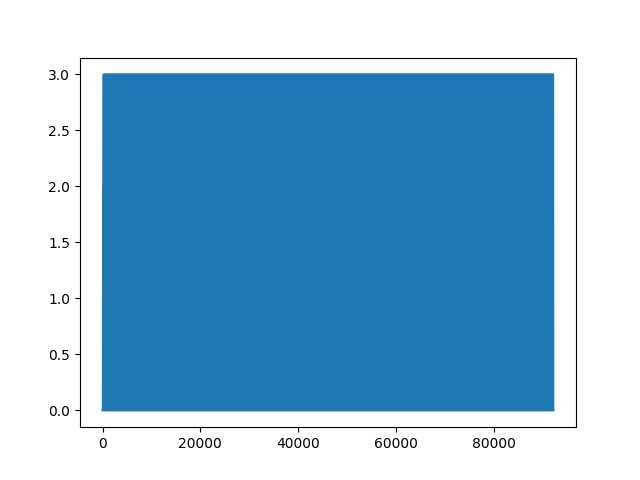

In [9]:
figure()
plot(pkts['channel_number'])

<IPython.core.display.Javascript object>


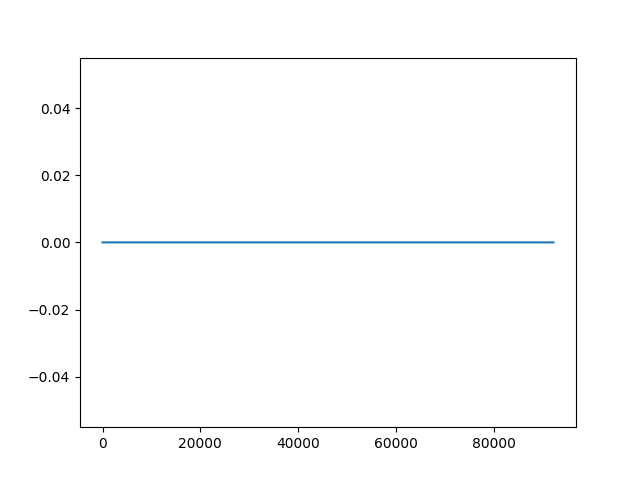

In [10]:
figure()
plot(pkts['beam_number'])

In [11]:
pkts.shape

(92223,)

In [12]:
nsamp_per_block = 2048//32
nchan = 4
nfpga = 6
nbl = 465
npol = 2
blksize = nsamp_per_block*nchan*nfpga
blksize

1536

In [13]:
nblk = len(pkts)//blksize
nblk

60

In [14]:
pkts = pkts[:nblk*blksize] # truncate data to an integer number of blocks

In [15]:
pkts['data'].shape

(92160, 1, 465, 2, 2)

In [16]:
d = pkts['data'].reshape(nblk, nfpga, nchan, nsamp_per_block, nbl, npol, 2) # set shape 
d.shape

(60, 6, 4, 64, 465, 2, 2)

In [17]:
# because of weirdness in the correlator each FPGA processes 4 channels, but to sort the 
# channels in order you need to do
# fpga0 channel 0, fpga 1 channel 0, fpga 2 channel 0 fpga 3 channel 0, fpga0 channel 1, ... etc.
# so with this transpose we put the time axes out the left, then re-order the channel axes, and leave everythign else
# alone

d = np.transpose(d, (0,3,2,1,4,5,6))
d.shape

(60, 64, 4, 6, 465, 2, 2)

In [18]:
# now we compress the time and channel axes
d = d.reshape(d.shape[0]*d.shape[1], d.shape[2]*d.shape[3], d.shape[4], d.shape[5], d.shape[6])

In [19]:
d.shape

(3840, 24, 465, 2, 2)

In [20]:
# make a complex array - this doubles the memory required, but who cares
dc = np.zeros(d.shape[:-1], dtype=np.complex64)
dc.real = d[..., 0]
dc.imag = d[..., 1]
dc.shape

(3840, 24, 465, 2)

In [21]:
pol1 = dc[...,0]
pol2 = dc[...,1]

<IPython.core.display.Javascript object>


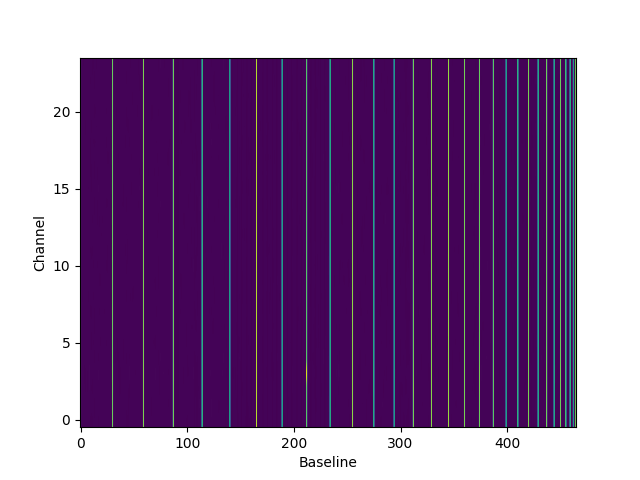

Text(0, 0.5, 'Channel')

In [22]:
figure()
imshow(abs(pol1.mean(axis=0)), aspect='auto', origin='lower')
xlabel('Baseline')
ylabel('Channel')

In [23]:
nant = 30
idx = 0
products = []
revproducts = {}
auto_products = []
cross_products = []
for a1 in range(1, nant+1):
    for a2 in range(a1, nant+1):
        print(f'{a1}-{a2}:{idx}')
        products.append((a1,a2))
        revproducts[(a1,a2)] = idx
        if a1 == a2:
            auto_products.append(idx)
        else:
            cross_products.append(idx)
            
        idx += 1
      
        
products = np.array(products, dtype=[('a1',np.int16), ('a2', np.int16)])

1-1:0
1-2:1
1-3:2
1-4:3
1-5:4
1-6:5
1-7:6
1-8:7
1-9:8
1-10:9
1-11:10
1-12:11
1-13:12
1-14:13
1-15:14
1-16:15
1-17:16
1-18:17
1-19:18
1-20:19
1-21:20
1-22:21
1-23:22
1-24:23
1-25:24
1-26:25
1-27:26
1-28:27
1-29:28
1-30:29
2-2:30
2-3:31
2-4:32
2-5:33
2-6:34
2-7:35
2-8:36
2-9:37
2-10:38
2-11:39
2-12:40
2-13:41
2-14:42
2-15:43
2-16:44
2-17:45
2-18:46
2-19:47
2-20:48
2-21:49
2-22:50
2-23:51
2-24:52
2-25:53
2-26:54
2-27:55
2-28:56
2-29:57
2-30:58
3-3:59
3-4:60
3-5:61
3-6:62
3-7:63
3-8:64
3-9:65
3-10:66
3-11:67
3-12:68
3-13:69
3-14:70
3-15:71
3-16:72
3-17:73
3-18:74
3-19:75
3-20:76
3-21:77
3-22:78
3-23:79
3-24:80
3-25:81
3-26:82
3-27:83
3-28:84
3-29:85
3-30:86
4-4:87
4-5:88
4-6:89
4-7:90
4-8:91
4-9:92
4-10:93
4-11:94
4-12:95
4-13:96
4-14:97
4-15:98
4-16:99
4-17:100
4-18:101
4-19:102
4-20:103
4-21:104
4-22:105
4-23:106
4-24:107
4-25:108
4-26:109
4-27:110
4-28:111
4-29:112
4-30:113
5-5:114
5-6:115
5-7:116
5-8:117
5-9:118
5-10:119
5-11:120
5-12:121
5-13:122
5-14:123
5-15:124
5-16:125
5-17:126
5-

<IPython.core.display.Javascript object>


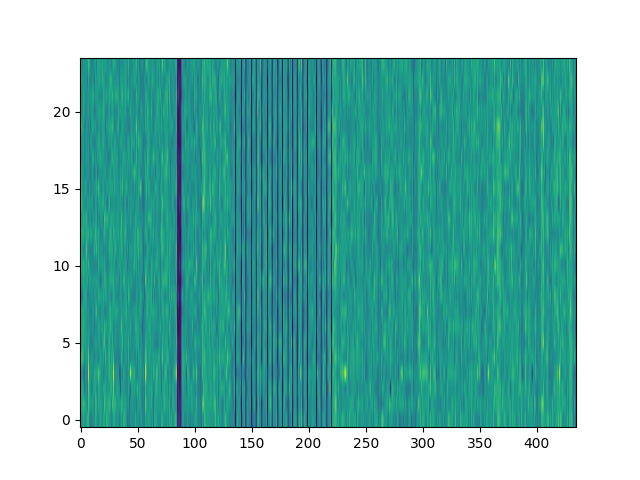

In [24]:
figure()
imshow(abs(pol1.mean(axis=0)[:, cross_products]), aspect='auto', origin='lower')

<IPython.core.display.Javascript object>


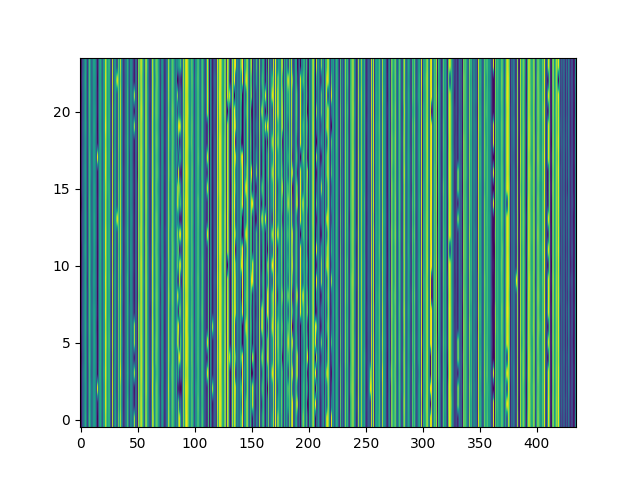

In [25]:
figure()
imshow(np.angle(pol1.mean(axis=0)[:, cross_products]), aspect='auto', origin='lower')

<IPython.core.display.Javascript object>


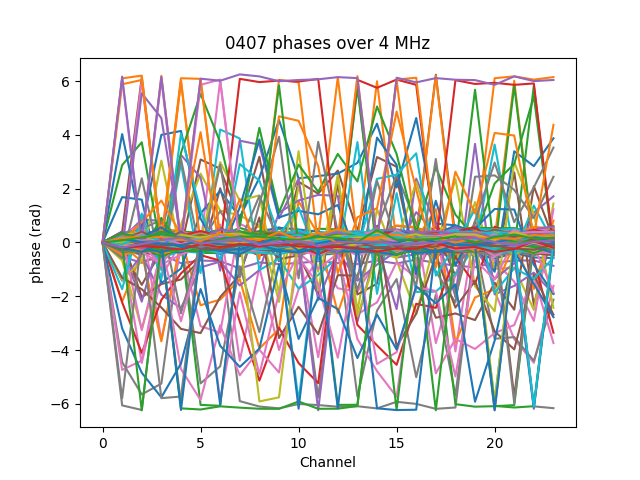

Text(0.5, 1.0, '0407 phases over 4 MHz')

In [26]:
figure()
ang = np.angle(pol1.mean(axis=0)[:, cross_products])
plot(ang - ang[0, :]) # normalise to first channel so we can see a bit better what's going on
xlabel('Channel')
ylabel('phase (rad)')
title('0407 phases over 4 MHz')